# BMI565: Bioinformatics Programming & Scripting

#### (C) Michael Mooney (mooneymi@ohsu.edu)

## Week 8: NumPy, Pandas, and Statsmodels

1. Scientific Computing in Python
2. Numpy
    - Numpy Arrays
    - Element-wise Operations
    - Boolean Indexing
3. Pandas for Data Analysis
    - Labeled data structures
    - Plotting with `Pandas`
4. Statistics
    - Descriptive Statistics
    - Linear regression
5. Scipy
    - Mann-Whitney Rank Test

#### Requirements

- Python 2.7 or 3.5
- `numpy` module (likely installed with `matplotlib`; if not `conda install numpy`)
- `scipy` module (`conda install scipy`)
- `pandas` module (`conda install pandas`)
- `statsmodels` module (`conda install statsmodels`)
- Data Files
    - `./data/serotonin_data.txt`

In [1]:
from __future__ import print_function, division

## Scientific Computing Packages

- <b>Numpy</b>: provides support for creating and efficiently manipulation large data structures (arrays, multi-dimensional arrays, matrices, etc.)
- Matplotlib: provides visualization of data through graphical plots (requires numpy)
- <b>Scipy</b>: provides a collection of mathematical algorithms for scientific computing
- Scikit-learn: a collection of machine-learning algorithms
- <b>Pandas</b>: data analysis tools, including specialized data structures (built on numpy)
- Statistical Packages:
    - <b>Statsmodels</b>: 
    - Rpy2: provides an interface between Python and R

In [2]:
## The following line is only needed inside the Jupyter 
## notebook, it is not a Python statement
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

## Numpy

### Numpy Arrays

Why are numpy arrays so efficient?
- Arrays are of a fixed size
- Stored in contiguous blocks of memory
- Arrays contain a single data type
- Vectorized (element-wise) operations

Indexing, slicing and iterating over arrays works the same as for lists. 

In [4]:
## Create an array from a list
myarray = np.array([1,2,3])
myarray

array([1, 2, 3])

In [5]:
## Create a multi-dimensional array from a list of lists
myarray2 = np.array([[1,2,3],[4,5,6]])
myarray2

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
## Get the dimensions of the array
myarray2.shape

(2, 3)

In [7]:
## Subset the array using indices
myarray2[0:1,:]

array([[1, 2, 3]])

In [8]:
## Create a range as an array
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
## Create an array of zeros
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
## Create an array of ones
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
## Create random arrays
## Uniform random numbers between 0 and 1
np.random.rand(10)

array([0.91278812, 0.29350489, 0.90383198, 0.88594446, 0.12807724,
       0.03405946, 0.03733491, 0.76547939, 0.85968632, 0.88348395])

In [12]:
np.random.rand(2,5)

array([[0.09821793, 0.12317116, 0.46851785, 0.39266068, 0.91556708],
       [0.91867923, 0.16945934, 0.28616971, 0.43710436, 0.52355796]])

In [13]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

In [14]:
## Normally distributed random numbers
np.random.randn(10)

array([-0.91886884,  0.43819423,  0.74819826, -0.33897709, -0.19058015,
        0.08310831, -2.40395953,  0.0322638 , -0.16291566,  0.97467503])

In [15]:
## Random integers
## Parameters: low, high(exclusive), size
np.random.randint(0, 10, 10)

array([3, 7, 2, 0, 5, 3, 4, 9, 5, 1])

In [16]:
## You can iterate over an array just like a list
for n in myarray:
    print(n)

1
2
3


In [17]:
myarray[0] = 2
myarray

array([2, 2, 3])

#### Numpy Array Attributes

<table align="left">
<tr><td style="text-align:center"><b>Attribute</b></td><td><b>Description</b></td></tr>
<tr><td style="text-align:center"><code>ndim</code></td><td>The number of dimensions</td></tr>
<tr><td style="text-align:center"><code>shape</code></td><td>A tuple specifying the size of each dimension</td></tr>
<tr><td style="text-align:center"><code>size</code></td><td>The total number of elements in the array</td></tr>
<tr><td style="text-align:center"><code>dtype</code></td><td>The data type of the array elements</td></tr>
    <tr><td style="text-align:center"><code>itemsize</code></td><td>The size (in bytes) of each array element</td></tr>
</table>


Mathematical operations for arrays:

[http://docs.scipy.org/doc/numpy/reference/routines.math.html](http://docs.scipy.org/doc/numpy/reference/routines.math.html)

Statistical operations for arrays:

[http://docs.scipy.org/doc/numpy/reference/routines.statistics.html](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html)

Linear algebra operations:

[http://docs.scipy.org/doc/numpy/reference/routines.linalg.html](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html)

In [18]:
np.zeros(10).dtype

dtype('float64')

In [19]:
## Get the sum of an array of numbers
np.sum(myarray)

7

### Element-wise Operations

Numpy allows you to easily perform operations on each element in an array.

In [20]:
sample_array = np.arange(10, dtype="float")
sample_array

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [21]:
sample_array/2

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [22]:
sample_array*3

array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27.])

### Boolean Indexing

In [23]:
## Use a condition to create an array of True/False values
idx = sample_array < 3
idx

array([ True,  True,  True, False, False, False, False, False, False,
       False])

In [24]:
## Subset an array using a boolean index
sample_array[idx]

array([0., 1., 2.])

In [25]:
## You can string multiple conditions together
idx2 = (sample_array < 3) | (sample_array > 6)
idx2

array([ True,  True,  True, False, False, False, False,  True,  True,
        True])

In [26]:
## You can also use the condition directly (no need to save the boolean index)
sample_array[sample_array < 3]

array([0., 1., 2.])

## `Pandas` Module

The `pandas` module contains a lot of great functionality for working with large data sets. `Pandas` is built on top of `Numpy` and works well with numerous other Python packages for scientific computing.

[http://pandas.pydata.org/pandas-docs/stable/index.html](http://pandas.pydata.org/pandas-docs/stable/index.html)


Example data ('./data/serotonin.txt') from the lava R package: [http://cran.r-project.org/web/packages/lava/index.html](http://cran.r-project.org/web/packages/lava/index.html)

### Labeled Data Structures

#### The `Series` data structure

A `Series` is very similar to a 1-D numpy array, but it also contains an index.

In [27]:
## Here we create a series of zeros, with an index 1-5
s1 = pd.Series(0, index=[1,2,3,4,5])
s1

1    0
2    0
3    0
4    0
5    0
dtype: int64

In [28]:
pd.Series(0, index=[6,2,3,4,5])

6    0
2    0
3    0
4    0
5    0
dtype: int64

#### The `DataFrame` data structure

The `pandas` `DataFrame` is very similar to a dataframe in `R`. It is essentially an indexed table that can contain heterogeneous data types.

In [29]:
## Here we create a dataframe by specifying the data,
## an index, and column names
df1 = pd.DataFrame(np.random.rand(5,5), index=[1,2,3,4,5], columns=['A','B','C','D','E'])
df1

,A,B,C,D,E
1,0.078832,0.548637,0.292812,0.636301,0.468802
2,0.108974,0.700532,0.978561,0.900392,0.244732
3,0.736982,0.243617,0.012347,0.623040,0.115850
4,0.064105,0.410235,0.266064,0.638782,0.864059
5,0.278077,0.330538,0.494449,0.066923,0.026187


In [30]:
## Read data into a pandas data frame
## Default options assume comma as delimiter and a header line with column names
dat = pd.read_csv('./data/serotonin_data.txt')

In [31]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = Fals

In [32]:
## Check the dimensions of the data frame
dat.shape

(250, 20)

In [33]:
## Get the column names
list(dat.columns.values)

['par',
 'sfc',
 'aci',
 'pci',
 'u1',
 'cau',
 'th',
 'put',
 'mid',
 'u2',
 'mem',
 'u',
 'age',
 'gene1',
 'gene2',
 'eta',
 'day',
 'depr',
 'T',
 'status']

In [34]:
## View the first few rows
dat.head(10)

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,mem,u,age,gene1,gene2,eta,day,depr,T,status
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,49,1.918266,-1.137870,1,1,-0.425573,30,0,1.019006,1
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,36,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,169,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,196,3.860327,0.167814,0,0,3.280688,335,0,30.000000,0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,64,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1
5,0.806983,1.058278,1.115488,0.651795,-1.917271,0.845913,0.901128,1.074159,1.008709,-0.411856,144,-0.254622,1.341796,1,1,0.000730,257,1,30.000000,0
6,1.219332,0.849995,0.981652,1.415329,-0.200643,0.960105,1.003532,0.738672,0.900867,-1.139413,49,-1.011483,0.022043,0,1,-1.581928,92,0,9.546252,1
7,0.691464,0.670306,0.565230,0.725663,-4.120131,0.852790,1.014858,0.772387,0.691587,-2.195653,81,-2.207785,-0.207005,0,1,-1.155688,31,1,30.000000,0
8,1.241741,1.216051,1.316316,1.272578,-0.122809,0.982992,0.966393,0.679840,0.719044,0.979394,36,1.123944,-1.119757,1,1,-2.078694,331,1,30.000000,0
9,1.318471,1.303153,1.215121,1.272650,1.202441,0.791729,1.058636,1.105358,0.957822,1.085417,64,0.204287,-1.027899,0,1,-0.561961,288,1,30.000000,0


In [35]:
## Create a new column by creating a series 
## and assigning it to a column name
dat['age_cat'] = pd.Series(0, index=dat.index)

In [36]:
dat.head()

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,...,u,age,gene1,gene2,eta,day,depr,T,status,age_cat
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,...,1.918266,-1.137870,1,1,-0.425573,30,0,1.019006,1,0
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,...,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,...,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0,0
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,...,3.860327,0.167814,0,0,3.280688,335,0,30.000000,0,0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,...,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1,0


In [37]:
dat['age_cat2'] = pd.Series(0, index=[2,3])

In [38]:
dat.head(20)

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,...,age,gene1,gene2,eta,day,depr,T,status,age_cat,age_cat2
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,...,-1.137870,1,1,-0.425573,30,0,1.019006,1,0,NaN
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,...,-0.951810,1,1,-2.959047,246,1,30.000000,0,0,NaN
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,...,1.619259,1,1,4.244131,243,1,30.000000,0,0,0.0
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,...,0.167814,0,0,3.280688,335,0,30.000000,0,0,0.0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,...,-0.908178,1,1,-1.082029,215,0,4.835404,1,0,NaN
5,0.806983,1.058278,1.115488,0.651795,-1.917271,0.845913,0.901128,1.074159,1.008709,-0.411856,...,1.341796,1,1,0.000730,257,1,30.000000,0,0,NaN
6,1.219332,0.849995,0.981652,1.415329,-0.200643,0.960105,1.003532,0.738672,0.900867,-1.139413,...,0.022043,0,1,-1.581928,92,0,9.546252,1,0,NaN
7,0.691464,0.670306,0.565230,0.725663,-4.120131,0.852790,1.014858,0.772387,0.691587,-2.195653,...,-0.207005,0,1,-1.155688,31,1,30.000000,0,0,NaN
8,1.241741,1.216051,1.316316,1.272578,-0.122809,0.982992,0.966393,0.679840,0.719044,0.979394,...,-1.119757,1,1,-2.078694,331,1,30.000000,0,0,NaN
9,1.318471,1.303153,1.215121,1.272650,1.202441,0.791729,1.058636,1.105358,0.957822,1.085417,...,-1.027899,0,1,-0.561961,288,1,30.000000,0,0,NaN


There a a number of ways to subset `pandas` dataframes. We'll show a few examples here, but for more details please read the documentation:

[https://pandas.pydata.org/pandas-docs/stable/indexing.html](https://pandas.pydata.org/pandas-docs/stable/indexing.html)

#### Subsetting with `.iloc`

In [39]:
## Use the iloc attribute to subset a dataframe based on position (integer index)
## Slice notation with integers can be used, and is the same 
## as seen earlier for lists and arrays
## With just a single slice specified, rows will be selected
dat.iloc[0:5]

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,...,age,gene1,gene2,eta,day,depr,T,status,age_cat,age_cat2
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,...,-1.137870,1,1,-0.425573,30,0,1.019006,1,0,NaN
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,...,-0.951810,1,1,-2.959047,246,1,30.000000,0,0,NaN
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,...,1.619259,1,1,4.244131,243,1,30.000000,0,0,0.0
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,...,0.167814,0,0,3.280688,335,0,30.000000,0,0,0.0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,...,-0.908178,1,1,-1.082029,215,0,4.835404,1,0,NaN


In [40]:
## You can also subset both rows and columns
dat.iloc[0:5,0:3]

,par,sfc,aci
0,1.541845,1.639296,1.631768
1,1.285776,1.314337,1.224379
2,1.633392,1.731265,1.588976
3,1.971132,1.735649,1.768737
4,1.376904,1.423676,1.461504


In [41]:
## Rather than slice notation, a list of indices can be used
dat.iloc[0:5,[1,2,5]]

,sfc,aci,cau
0,1.639296,1.631768,0.941444
1,1.314337,1.224379,1.018560
2,1.731265,1.588976,0.965680
3,1.735649,1.768737,0.944994
4,1.423676,1.461504,0.778490


#### Subsetting with `.loc`

In [42]:
## Use the loc() method to subset using labels
## Select a single column (use a list to get multiple columns)
## Integer slices should not be used with the loc method, 
## but you can provide a list of index values
dat.loc[range(5),['par', 'sfc']]

,par,sfc
0,1.541845,1.639296
1,1.285776,1.314337
2,1.633392,1.731265
3,1.971132,1.735649
4,1.376904,1.423676


In [43]:
## Subsetting the data structure based on a condition
gene_idx = (dat['gene1'] == 1) & (dat['gene2'] == 1)
gene_idx

0       True
1       True
2       True
3      False
4       True
       ...  
245    False
246    False
247    False
248    False
249    False
Length: 250, dtype: bool

In [44]:
## The loc attribute will also accept a boolean array as an indexer
dat.loc[gene_idx].head()

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,...,age,gene1,gene2,eta,day,depr,T,status,age_cat,age_cat2
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,...,-1.137870,1,1,-0.425573,30,0,1.019006,1,0,NaN
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,...,-0.951810,1,1,-2.959047,246,1,30.000000,0,0,NaN
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,...,1.619259,1,1,4.244131,243,1,30.000000,0,0,0.0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,...,-0.908178,1,1,-1.082029,215,0,4.835404,1,0,NaN
5,0.806983,1.058278,1.115488,0.651795,-1.917271,0.845913,0.901128,1.074159,1.008709,-0.411856,...,1.341796,1,1,0.000730,257,1,30.000000,0,0,NaN


In [45]:
## Set values based on a condition (use the loc attribute)
## Here we update the 'age_cat' column for only those rows where 'age' is > 0
dat.loc[dat['age'] > 0, 'age_cat'] = 1

In [46]:
dat.head()

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,...,age,gene1,gene2,eta,day,depr,T,status,age_cat,age_cat2
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,...,-1.137870,1,1,-0.425573,30,0,1.019006,1,0,NaN
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,...,-0.951810,1,1,-2.959047,246,1,30.000000,0,0,NaN
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,...,1.619259,1,1,4.244131,243,1,30.000000,0,1,0.0
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,...,0.167814,0,0,3.280688,335,0,30.000000,0,1,0.0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,...,-0.908178,1,1,-1.082029,215,0,4.835404,1,0,NaN


In [47]:
dat.loc[dat['age'] > 0, 'age_cat2'] = '1'

In [48]:
dat.head(20)

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,...,age,gene1,gene2,eta,day,depr,T,status,age_cat,age_cat2
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,...,-1.137870,1,1,-0.425573,30,0,1.019006,1,0,NaN
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,...,-0.951810,1,1,-2.959047,246,1,30.000000,0,0,NaN
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,...,1.619259,1,1,4.244131,243,1,30.000000,0,1,1
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,...,0.167814,0,0,3.280688,335,0,30.000000,0,1,1
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,...,-0.908178,1,1,-1.082029,215,0,4.835404,1,0,NaN
5,0.806983,1.058278,1.115488,0.651795,-1.917271,0.845913,0.901128,1.074159,1.008709,-0.411856,...,1.341796,1,1,0.000730,257,1,30.000000,0,1,1
6,1.219332,0.849995,0.981652,1.415329,-0.200643,0.960105,1.003532,0.738672,0.900867,-1.139413,...,0.022043,0,1,-1.581928,92,0,9.546252,1,1,1
7,0.691464,0.670306,0.565230,0.725663,-4.120131,0.852790,1.014858,0.772387,0.691587,-2.195653,...,-0.207005,0,1,-1.155688,31,1,30.000000,0,0,NaN
8,1.241741,1.216051,1.316316,1.272578,-0.122809,0.982992,0.966393,0.679840,0.719044,0.979394,...,-1.119757,1,1,-2.078694,331,1,30.000000,0,0,NaN
9,1.318471,1.303153,1.215121,1.272650,1.202441,0.791729,1.058636,1.105358,0.957822,1.085417,...,-1.027899,0,1,-0.561961,288,1,30.000000,0,0,NaN


In [49]:
dat['age_cat2'].dtype

dtype('O')

In [50]:
dat['age_cat'].dtype

dtype('int64')

### Plotting with `Pandas`

A few examples of simple plots available in `pandas`... We'll dive into more advanced plotting next week.

In [51]:
## Get a summary of the data (value counts)
gene1_counts = dat['gene1'].value_counts()
gene1_counts

0    133
1    117
Name: gene1, dtype: int64

In [52]:
## Another way to create a tabular view of you data
dat.groupby(['gene1','gene2']).size()

gene1  gene2
0      0        60
       1        73
1      0        59
       1        58
dtype: int64

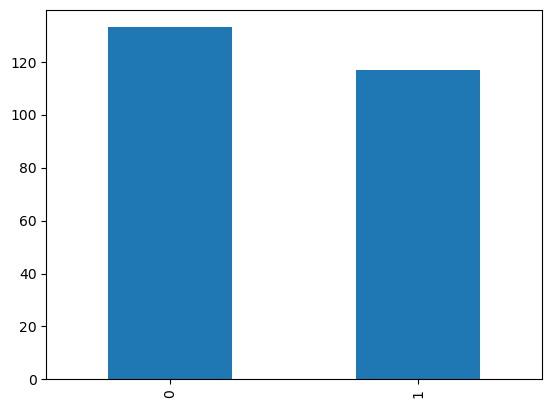

In [53]:
## Bar plot
gene1_counts.plot(kind="bar");

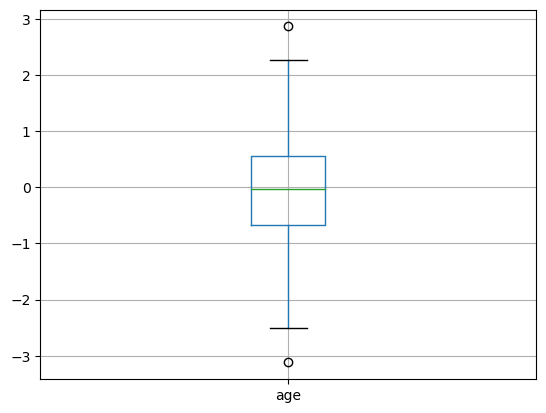

In [54]:
## Box plot
x = dat.boxplot(column='age', return_type='axes');
plt.savefig('boxplot1.pdf')

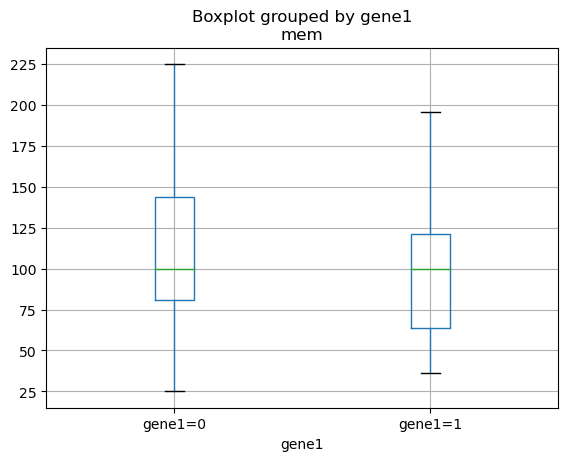

In [55]:
bp = dat.boxplot(column='mem', by='gene1')
bp.set_xticklabels(['gene1=0','gene1=1']);

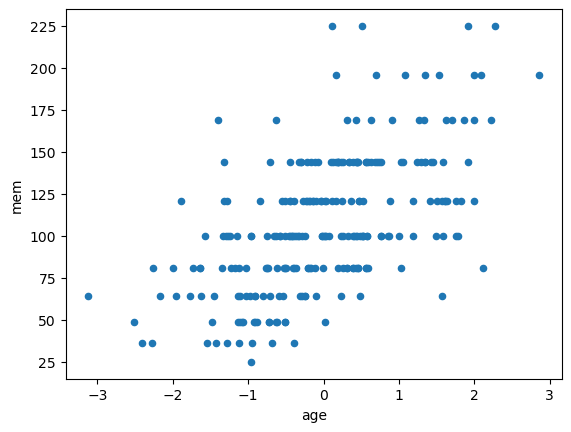

In [56]:
## Scatter plot
dat.plot(x='age', y='mem', kind="scatter");

## Statistics in Python

The `statsmodels` package contains functions and classes for data exploration and many different statistical procedures (modeling, hypothesis testing). `Pandas` and `Scipy` also have statistics modules.

[http://statsmodels.sourceforge.net/stable/index.html](http://statsmodels.sourceforge.net/stable/index.html)

[http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics](http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics)

[http://docs.scipy.org/doc/scipy-0.13.0/reference/stats.html](http://docs.scipy.org/doc/scipy-0.13.0/reference/stats.html)

### Descriptive Statistics

In [57]:
## Pandas summary statistics
dat['age'].describe()

count    250.000000
mean      -0.009506
std        1.036330
min       -3.119118
25%       -0.676994
50%       -0.033606
75%        0.561708
max        2.861592
Name: age, dtype: float64

In [58]:
## Missing data counts in Pandas
dat.isnull().sum()

par           0
sfc           0
aci           0
pci           0
u1            0
cau           0
th            0
put           0
mid           0
u2            0
mem           0
u             0
age           0
gene1         0
gene2         0
eta           0
day           0
depr          0
T             0
status        0
age_cat       0
age_cat2    129
dtype: int64

In [59]:
## Summary stats from SciPy
from scipy import stats
stats.describe(dat['age'])

DescribeResult(nobs=250, minmax=(-3.11911751487801, 2.86159181140889), mean=-0.009505743615708603, variance=1.0739808473043826, skewness=0.056228167992158774, kurtosis=-0.11090770812166628)

In [60]:
## Summary stats from statsmodels
import statsmodels.api as sma
desc = sma.stats.DescrStatsW(dat[['age','mem']])
desc.mean

array([-9.50574362e-03,  1.07140000e+02])

In [61]:
## Create a correlation matrix
desc.corrcoef

array([[1.        , 0.59016791],
       [0.59016791, 1.        ]])

In [62]:
## Equivalent correlation matrix using Numpy
np.corrcoef(dat[['age','mem']], rowvar=0)

array([[1.        , 0.59016791],
       [0.59016791, 1.        ]])

In [63]:
## Calculate a T-test to compare means
sma.stats.ttest_ind(dat['mem'][dat['gene1']==1], dat['mem'][dat['gene1']==0])

(-2.9567022934300766, 0.0034094451435307434, 248.0)

In [64]:
help(sma.stats.ttest_ind)

Help on function ttest_ind in module statsmodels.stats.weightstats:

ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
    ttest independent sample
    
    Convenience function that uses the classes and throws away the intermediate
    results,
    compared to scipy stats: drops axis option, adds alternative, usevar, and
    weights option.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples, see notes for 2-D case
    x2 : array_like, 1-D or 2-D
        second of the two independent samples, see notes for 2-D case
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           * 'two-sided' (default): H1: difference in means not equal to value
           * 'larger' :   H1: difference in means larger than value
           * 'smaller' :  H1: difference in means smaller than value
    
    usevar : str, 'pooled' or 'unequal'
        If ``poole

### Linear Regression

In [65]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='mem ~ age', data=dat)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mem   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     132.5
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           7.45e-25
Time:                        09:24:08   Log-Likelihood:                -1228.2
No. Observations:                 250   AIC:                             2460.
Df Residuals:                     248   BIC:                             2467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.3611      2.090     51.372      0.0

In [66]:
## The regression fit parameters
res.params

Intercept    107.361123
age           23.262082
dtype: float64

In [67]:
res.params.loc['age']

23.262081900498305

## SciPy
### Mann-Whitney Rank Test

You will use this test as part of your final project.

In [68]:
x1 = np.random.normal(0,1,30)
x2 = np.random.normal(3,1,50)

In [69]:
from scipy import stats
u, p = stats.mannwhitneyu(x1, x2)
print("x1 =", x1)
print("x2 =", x2)
print("U =", u)
print("P-value =", p)

x1 = [ 0.64830267 -0.85807783 -1.10364489 -0.61070499  2.02961796 -1.23631603
 -0.56066448  0.21121933  1.89777787  0.36269713  1.22263722  0.73771234
 -1.18482149 -0.75932398 -1.70729039 -0.71587813 -2.47785455  0.20938257
 -0.33520591  0.99835961  0.56793309 -0.05465099 -0.29026733  0.04045324
  0.32633535  0.85855949 -0.11757848 -0.40259588  1.02510133 -1.30015093]
x2 = [3.14923643 4.67861195 2.9301624  1.79257762 2.18361338 3.3095365
 4.35860016 2.30491013 2.90078371 2.35120094 2.5303874  3.10706133
 3.84013118 3.8381988  4.06618537 3.53761552 2.8772008  3.72092046
 2.01704844 2.85188419 2.49152904 3.03654028 4.8121307  3.30651495
 3.4891461  4.5005526  2.98048971 5.56333939 2.65104145 3.22753199
 3.2528719  2.25665096 3.54004687 3.0932347  1.80673098 2.6054281
 3.09124476 2.38230376 3.18007388 1.62014748 4.22311466 2.28481249
 3.14070653 1.96980357 2.5456466  2.61480715 4.19394669 3.29481165
 1.52498826 3.76411118]
U = 10.0
P-value = 1.9938160190815486e-13


In [70]:
help(stats.mannwhitneyu)

Help on function mannwhitneyu in module scipy.stats._mannwhitneyu:

mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto', *, nan_policy='propagate', keepdims=False)
    Perform the Mann-Whitney U rank test on two independent samples.
    
    The Mann-Whitney U test is a nonparametric test of the null hypothesis
    that the distribution underlying sample `x` is the same as the
    distribution underlying sample `y`. It is often used as a test of
    difference in location between distributions.
    
    Parameters
    ----------
    x, y : array-like
        N-d arrays of samples. The arrays must be broadcastable except along
        the dimension given by `axis`.
    use_continuity : bool, optional
        Whether a continuity correction (1/2) should be applied.
        Default is True when `method` is ``'asymptotic'``; has no effect
        otherwise.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypoth

## In-Class Exercises

In [ ]:
## Exercise 1.
## Use the np.random.normal(5, 1, 100) function to 
## create an array of 100 random numbers.
## Mean = 5, SD = 1
## Count how many random numbers are greater than 5
## 


In [ ]:
## Exercise 2.
## Create a new categorical variable in the serotonin data frame 
## called 'highmem'. Set the variable = 1 for subjects with a 'mem' 
## value > 100, otherwise 0. Split the data into two different 
## data frames based on the value of 'highmem'. Create boxplots 
## of 'age' for both data frames, and identify the mean, min, 
## max for each.
##


## References
- Python for Bioinformatics, Sebastian Bassi, CRC Press (2010)
- [http://docs.scipy.org/doc/numpy/reference/index.html](http://docs.scipy.org/doc/numpy/reference/index.html)
- [http://pandas.pydata.org/pandas-docs/stable/](http://pandas.pydata.org/pandas-docs/stable/)
- [http://statsmodels.sourceforge.net/stable/index.html](http://statsmodels.sourceforge.net/stable/index.html)
- [http://docs.scipy.org/doc/numpy/reference/index.html](http://docs.scipy.org/doc/numpy/reference/index.html)
- [http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mannwhitneyu.html](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mannwhitneyu.html)

#### Last Updated: 18-Sep-2022¶